<a href="https://colab.research.google.com/github/FahmidaMitu/COVID-19-Severity-Detection-from-Lung-CT-Scan-Images-using-CNN/blob/codes/Sequential_without_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
base_dir=r"/content/drive/MyDrive/CSE499A.COVID-19/Classified_Images"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=128

#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)




Found 2750 images belonging to 6 classes.
Found 303 images belonging to 6 classes.


In [ ]:
cnn = tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(6,activation='softmax'))


In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

# cnn.fit(train_datagen,epochs=100,validation_data=test_datagen)

In [ ]:
history = cnn.fit(train_datagen,epochs=50,validation_data=test_datagen)

Epoch 1/50
28/28 [==============================] - 1292s 46s/step - loss: 1.5990 - accuracy: 0.3789 - val_loss: 1.5807 - val_accuracy: 0.3828
Epoch 2/50
28/28 [==============================] - 86s 3s/step - loss: 1.5760 - accuracy: 0.3807 - val_loss: 1.5638 - val_accuracy: 0.3927
Epoch 3/50
28/28 [==============================] - 85s 3s/step - loss: 1.5681 - accuracy: 0.3825 - val_loss: 1.5535 - val_accuracy: 0.3927
Epoch 4/50
28/28 [==============================] - 85s 3s/step - loss: 1.5586 - accuracy: 0.3844 - val_loss: 1.5461 - val_accuracy: 0.4092
Epoch 5/50
28/28 [==============================] - 86s 3s/step - loss: 1.5324 - accuracy: 0.3949 - val_loss: 1.5172 - val_accuracy: 0.4290
Epoch 6/50
28/28 [==============================] - 86s 3s/step - loss: 1.4915 - accuracy: 0.4058 - val_loss: 1.4515 - val_accuracy: 0.4191
Epoch 7/50
28/28 [==============================] - 85s 3s/step - loss: 1.4147 - accuracy: 0.4149 - val_loss: 1.3842 - val_accuracy: 0.4587
Epoch 8/50
28/28 

In [ ]:
history = cnn.fit(train_datagen,epochs=100,validation_data=test_datagen)

Epoch 1/100
22/22 [==============================] - 1142s 52s/step - loss: 1.6352 - accuracy: 0.3615 - val_loss: 1.5759 - val_accuracy: 0.3828
Epoch 2/100
22/22 [==============================] - 99s 4s/step - loss: 1.5801 - accuracy: 0.3811 - val_loss: 1.5693 - val_accuracy: 0.3828
Epoch 3/100
22/22 [==============================] - 98s 4s/step - loss: 1.5693 - accuracy: 0.3811 - val_loss: 1.5568 - val_accuracy: 0.3828
Epoch 4/100
22/22 [==============================] - 99s 4s/step - loss: 1.5552 - accuracy: 0.3862 - val_loss: 1.5527 - val_accuracy: 0.3828
Epoch 5/100
22/22 [==============================] - 103s 5s/step - loss: 1.5294 - accuracy: 0.3927 - val_loss: 1.5121 - val_accuracy: 0.4290
Epoch 6/100
22/22 [==============================] - 99s 4s/step - loss: 1.4877 - accuracy: 0.4044 - val_loss: 1.4896 - val_accuracy: 0.4323
Epoch 7/100
22/22 [==============================] - 99s 4s/step - loss: 1.4178 - accuracy: 0.4091 - val_loss: 1.4528 - val_accuracy: 0.4488
Epoch 8/1

In [ ]:
import matplotlib.pyplot as plt


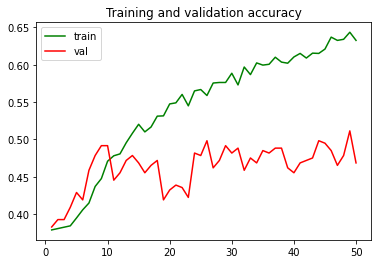

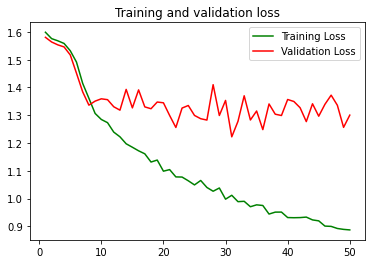

In [ ]:
# Extract information 
# plt.figure(figsize=(18,4))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Define range
epochs = range(1,len(acc)+1)

# Plot results 
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
# plt.ylabel('accuracy')
# plt.xlabel('epoch')